##  DakiyaPro: Email Classification and Recommendation System using Machine Learning

                                         Name:- Mahesh Deshmukh 
                                         Contact:- mb29deshmukh@gmail.com
                                         Name of Institute:- The CareerGram Institute, Pune.
                                         
                                         
                                         
                                         

### Objective 

        We get a lot of emails every day, but we cannot see every email. So we need to classify them according to our        requirements. for this purpose, we can create a classification model for emails. This classification model can help to    classify emails into specific categories.
        Every day, a user gets a lot of emails, but the user doesn't interest in most of the emails. Therefore, we can      create a recommendation system for emails, which are based on user interest. So, users can like these recommended emails. Also, we can suggest some blogs or product-related information to users. Then user will be happy.

### The Task

        Therefore by defining our objective we need to do the following tasks: 1. Classifying emails according to the genre/type. 2. Creating a emails recommendation system based on user interest.

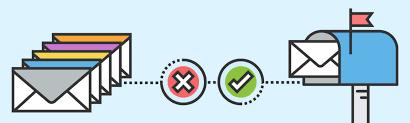

### Abstract 

        The purpose of this project is to classify the emails effectively and recommend similar(emails of interest) emails  to the user. Therefore, we take emails from the email account and create an essential dataset for this project. Further, we add labels to the categories for the dataset. We clean this data as possible for better results. We use the text pre-processing methods to clean the data. In data cleaning, we specifically do the following things: 1.We remove the unwant-ed words (i.e. stop words.) and later stem those words. 2. We use Count Vector(CV) and Term Frequency-Inverse Document   Frequency (TF-IDF) model to convert sentences into tokens (i.e. unique words). These tokens help to build classification models. We build the classification model using the Naive-Bayes algorithm based on CV and TF-IDF models. The basis on   the results, We select the appropriate model for email classification. 
        Here, we create new recommendation systems based on two different approaches. The first one is content-based filter-ing, and the second is collaborative filtering. We effectively use cosine similarity in both approaches. In a content-  based filtering approach, we define the emails of the user's interest by sampling the past 30 days' seen emails. Based  on the user's interest, we recommend recent five similar emails(emails of interest) to the user. In the collaborative filtering approach, we recommend the five most similar emails if getting new emails to the user. 
        We observe that both the model's CV with 98.21% and TF-IDF with 95.53% can be used for the classification of the    emails, while the CV model is found to be more accurate. Also, both recommender systems are found to be efficient in    this project. Also, we can change the number of days to define users' interests. We can recommend the most recent emails using our recommendation system.

### Introduction

        We get lot of emails every day, but sometimes we miss out on some important emails because of unnecessary emails. Every day, we can't waste time on shortlisting. Therefore, We find a machine learning solution which classifies emails into useful categories. Further, we create email recommendation systems which will not only avoid missing out the important emails but also this enrich the users get more information in the field of interest. In email classification, data has a text format. So, we have to convert this data into machine language. Here, we use text analysis techniques for text pre-processing. Before building a machine learning model, we give the label of category for those emails because we would classify the emails as per the requirements.  We classify our email by its genre/type.
        In today's digital world, recommendation techniques are boosting sales by implementing recommender systems on their websites. Recommender systems aim to predict users' interests and recommend product items that customers make happy.     Sites like Spotify, YouTube or Netflix use various kinds of recommendation systems to suggest playlists or videos. Ther-efore, we can also create a recommendation system for emails which are based on user interest.

### The Architecture of Project

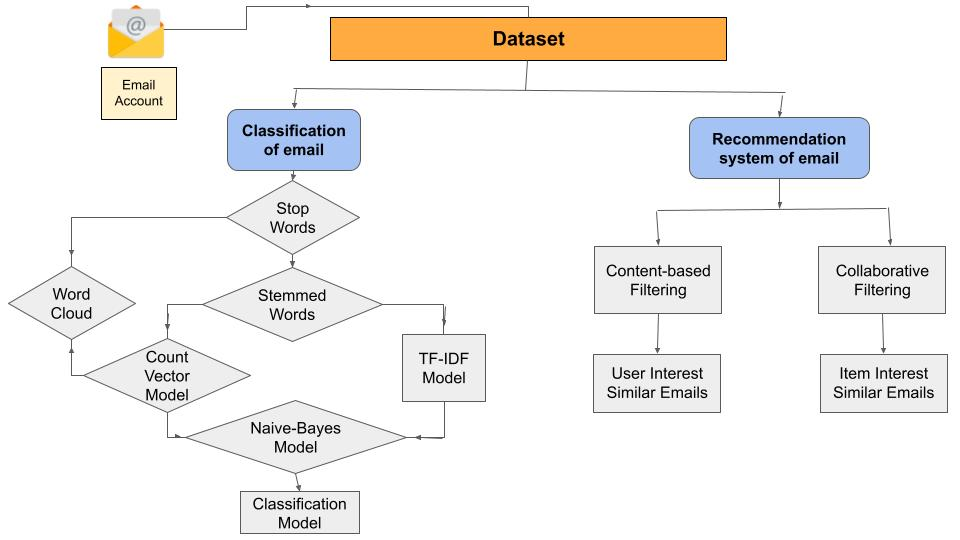

### Data Exploration

    Data Exploration is finding any initial patterns in the dataset using statistical techniques and visualization tools. In that step, we can handle missing values and duplicate values. We can do feature engineering. We can also roughly decide which algorithm we have to choose the basis on data, etc.

In [1]:
# Importing necessary libraries
import numpy as np                                # It can be used to manipulate mathematical calculations.
import pandas as pd                               # It can be used to manipulate data frames.
import matplotlib.pyplot as plt                   # It can be used to visualize plots.
import seaborn as sn                              # It can also use to visualize plots.

import warnings
warnings.filterwarnings('ignore')                  # It can be used to ignore warning messages during execution.  

In [2]:
# Reading data set
email_df = pd.read_csv('final_email_dataset.csv')

Project dataset source link: https://drive.google.com/file/d/1y9ATJxvGPb15B61IW1PZGEfd-5lEW9M-/view?usp=sharing

In [3]:
# Seeing the first five data points.
email_df.head()

,name,subject,email,time,type_of_email,seen_email
0,MakeMyTrip <noreply@zen-makemytrip.com>,=?UTF-8?Q?=F0=9F=9A=80ARRIVED:_MakeMyTrip-Assu...,Tap to book now for your next ride to the airp...,"Fri, 23 Sep 2022 18:08:26",marketing,seen
1,IRCTC Tourism Packages <irctctourismoffers@irc...,Essence of Northeast Group Package Ex Guwahati,EGH Essence of Northeast Group P...,"Wed, 28 Sep 2022 06:27:43",marketing,seen
2,"""IRCTC Tourism Packages"" <irctctourismoffers@i...",Best of Himachal Ex Pune,WMA A Best of Himachal Ex Pune Tour I...,"Thu, 22 Sep 2022 18:43:05",marketing,seen
3,"""IRCTC Tourism Packages"" <irctctourismoffers@i...",TRAINS AT A GLANCE THE OFFICIAL TIME TABLE OF ...,TAG TRAINS AT A GLANCE THE OFFICIAL TI...,"Tue, 20 Sep 2022 01:06:56",marketing,not_seen
4,IRCTC Tourism Packages <irctctourismoffers@irc...,ENCHANTING KASHMIR Flight Package Ex Delhi,NDA ENCHANTING KASHMIR Flight Packag...,"Wed, 14 Sep 2022 15:47:54",marketing,not_seen


In [4]:
# Determining the dimension of the dataset.
print('Dimension of the data set:', email_df.shape)
print('Columns of the data set:\n', email_df.columns)

Dimension of the data set: (373, 6)
Columns of the data set:
 Index(['name', 'subject', 'email', 'time', 'type_of_email', 'seen_email'], dtype='object')


In [5]:
# Showing brief information about the dataset.
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           373 non-null    object
 1   subject        373 non-null    object
 2   email          373 non-null    object
 3   time           373 non-null    object
 4   type_of_email  373 non-null    object
 5   seen_email     373 non-null    object
dtypes: object(6)
memory usage: 17.6+ KB


@Explanation:- We can see that there are no missing values in the subject column and the time variable is misclassified data type. We should convert the object data type of time into DateTime.

In [6]:
# Seeing duplicate values in the dataset.
email_df.duplicated().sum()

0

@Explanation:- There isn't any duplicate value in the dataset.

In [7]:
# Creating a new variable for sentiment analysis which is based on type of email
sentiment_list = []
for i in range(0,len(email_df)):    
    if email_df.type_of_email.iloc[i] == 'marketing':
        sentiment_list.append(0)     # Assigning 0 value for marketing emails
    elif email_df.type_of_email.iloc[i] == 'job':
        sentiment_list.append(1)     # Assigning 1 value for job emails.
    elif email_df.type_of_email.iloc[i] == 'important':
        sentiment_list.append(2)     # Assigning 2 value for important emails.
        
# Assigning all sentiment values.
email_df['sentiment'] = sentiment_list  

In [8]:
# Confirming the sentiment variable.
email_df.sentiment.value_counts()

0    147
2    118
1    108
Name: sentiment, dtype: int64

@Explanation:- It's perfect.

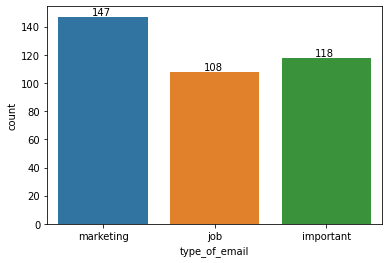

In [9]:
# Seeing distribution of dataset according to types of emails.
ax = sn.countplot(x='type_of_email',data=email_df)               # countplot() method is used to show the counts of observations in each categorical bin using bars.

for p in ax.patches:
    plt.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+1)) # It is used to label the count values in the graph.
    
# plt.ylim([0,45])       # It is used to specify the upper and lower limit of the y-axis.
plt.show()

@Explanation:- Out of 373 records, 147 records belong to marketing and 108 records belong to job sentiments, while 118 records belong to important sentiments. Thus, important and job sentiment documents have nearly equal representation in the dataset, but marketing documents have more representation in the dataset. 

## Email Classification

### Text Preprocessing

        Text Processing is one of the most important parts of text analysis. Here, we can do cleaning text, convert           sentences into tokens(i.e. unique words), removing unwanted words, i.e. stop words. Sometimes, we have many words, but     they have similar meanings. That time, we need to convert all those words into single words. Those methods are called         stemming and lemmatization. All such things do in text processing.

In [10]:
# Creating duplicate a dataset of email.
email_df_1 = email_df.copy()

In [11]:
## Creating a user-defined function to clean text, such as removing punctuation marks and numbers, and converting text into lowercase. 
def cleaning_text(text):
    # Importing library for cleaning text.
    import re
    
    lower_text = text.lower()  # Converting text into lowercase
    remove = re.sub(r'[^a-zA-Z]',' ',lower_text) # Removing punctuation marks and numbers
   
    # Returning clean text
    return remove

In [12]:
## Creating a user-defined function to clean text of series data.
def clean(df,column_name):  # Taking 2 arguments such as data frame and its column name.
    
    clean_list = []
    for i in range(0,len(df)):
        clean_list.append(cleaning_text(df[column_name].iloc[i]))  # Using cleaning function to clean text
        
    # Replacing uncleaned text data.
    df[column_name] = clean_list

In [13]:
# Cleaning name column
clean(email_df_1,'name')

# Cleaning subject column
clean(email_df_1,'subject')

# Cleaning email column
clean(email_df_1,'email')

In [14]:
# Showing first five rows
email_df_1.head()

,name,subject,email,time,type_of_email,seen_email,sentiment
0,makemytrip noreply zen makemytrip com,utf q f f a arrived makemytrip assu...,tap to book now for your next ride to the airp...,"Fri, 23 Sep 2022 18:08:26",marketing,seen,0
1,irctc tourism packages irctctourismoffers irc...,essence of northeast group package ex guwahati,egh essence of northeast group p...,"Wed, 28 Sep 2022 06:27:43",marketing,seen,0
2,irctc tourism packages irctctourismoffers i...,best of himachal ex pune,wma a best of himachal ex pune tour i...,"Thu, 22 Sep 2022 18:43:05",marketing,seen,0
3,irctc tourism packages irctctourismoffers i...,trains at a glance the official time table of ...,tag trains at a glance the official ti...,"Tue, 20 Sep 2022 01:06:56",marketing,not_seen,0
4,irctc tourism packages irctctourismoffers irc...,enchanting kashmir flight package ex delhi,nda enchanting kashmir flight packag...,"Wed, 14 Sep 2022 15:47:54",marketing,not_seen,0


@Explanation:- Now, It looks like the required dataset.

In [15]:
# Doing all text data together.
email_df_1['all_text'] = email_df_1['name'] + email_df_1['subject'] + email_df_1['email']

@Explanation:- We collected all text data together for creating Bag-of-Model.

### Count Vector Model

        The count vector model is one of the methods of the Bag-of-Words (BoW) Model. It is used to transform a given text   into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It is very helpful for large text data. 
        In Bag-of-Words (BoW) Model, Each word is considered a feature, and it is used to find whether this feature exists   or doesn't exist in a sentence. Each sentence (record) is called a document and collection of all documents is called         corpus.

In [16]:
# Importing count vector model
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the count vectorizer algorithm to use count the occurrence of each word in the document.
cv_model = CountVectorizer()

# Creating a dictionary from the corpus
feature_vector = cv_model.fit(email_df_1.all_text)

# Getting the feature names from the dictionary
feature = feature_vector.get_feature_names()

# Randomly pick up 10 words 
import random

random.sample(feature,10)

['gstjn',
 'ampere',
 'hierarchy',
 'curve',
 'envisioned',
 'notoriously',
 'liagdqpeaxnjb',
 'inspiring',
 'pu',
 'alexander']

In [17]:
# Transforming the document into vectors
email_feature = cv_model.transform(email_df_1.all_text)

# Determining dimension of sparse matrix 
email_feature.shape

(373, 19080)

#### Removing stop word

        Which words are irrelevant in determining the sentiment of the document, these words are stop words, and we have to remove these words. When we remove stop words, they decrease the data size and time for training the model. Thus, it     could increase classification accuracy. sklearn.feature_extraction.text provides a list of pre-defined stop words in    English, which can be used as a reference to remove the stop words from the dictionary.

In [18]:
# Converting matrix to a data frame
email_feature_df = pd.DataFrame(email_feature.todense())

# Setting the column names to the feature i.e. words
email_feature_df.columns = feature

# Assigning the sentiment labels to the email_feature_df data frame
email_feature_df['sentiment'] = email_df_1.sentiment

# Showing the first five-row  
email_feature_df.head()

,aa,aaa,aaaabc,aaaaxsdg,aaaayf,aaaayn,aaaayntn,aaaaynyva,aaad,aaafa,...,zzpqmingw,zzr,zzrn,zzrny,zzrx,zzw,zzwn,zzx,zzxi,zzxr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Counting the frequency of the features
feature_count = np.sum(email_feature.toarray(),axis=0)

# Creating data frame for feature count variable
feature_count_df = pd.DataFrame(dict(feature=feature, count=feature_count))

# Arranging the feature count data frame in descending order to find the 15 most counted features. 
feature_count_df.sort_values('count',ascending=False)[:15]

,feature,count
7796,https,7214
3198,com,7105
13483,px,5742
4412,digest,5644
10671,medium,4935
15486,source,4030
13949,reader,3943
4118,demail,3706
8942,job,3682
732,amp,3340


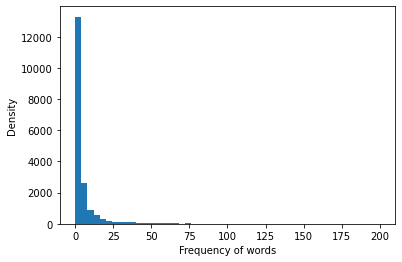

In [20]:
# Let's see the frequency of words.
plt.hist(feature_count_df['count'],bins=50,range=(0,200))     # It is used to create histograms.
plt.xlabel('Frequency of words')
plt.ylabel('Density')
plt.show()

@Explanation:- We can see, here low-frequency words are more. So these words create noise in the model.

In [21]:
# The unwanted word means Low-frequency Words, and we have to remove these words from the original corpus for better accuracy of the model. 
unwanted_word = feature_count_df[(feature_count_df['count']==1)|(feature_count_df['count']==2)|(feature_count_df['count']==3)]   # Extract only unwanted words
unwanted_word[:15]                                               # Show only 15 features

,feature,count
5,aaaayn,1
6,aaaayntn,1
7,aaaaynyva,1
8,aaad,2
9,aaafa,2
10,aabf,2
13,aadb,1
14,aadvanced,1
17,aafc,1
18,aafe,1


In [22]:
print('Total single words are:',len(unwanted_word))

Total single words are: 13291


@Explanation: So we have to remove 13,291 words from our document. i.e., stop words of our dataset.

In [23]:
# Importing pre-defined stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Adding single words to the list of stop words
my_stop_words = ENGLISH_STOP_WORDS.union(unwanted_word.feature)

# Determining total stop words
len(my_stop_words)

13571

So finally, we will remove 13571 words to create a better model.

#### Stemming

        Doing text mining, we get a major problem because many words (i.e. features) in the BoW model have similar meanings, but they treat as separate features in that model. So this problem can solve by the stemming method. That method removes the differences between inflected forms of a word to reduce each word to its root form. for e.g. love and loved words,  then loved word cut ed portion and match with other word love. then take one single word love as feature. It could incr-ease the accuracy of the model.  

In [24]:
# Importing stemming library
from nltk.stem.snowball import PorterStemmer

# Initializing stemming model
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()   # it is used to return a function to preprocess the text before tokenization.

# Creating user-defined function for stemming and stopping removal words
def stemmed_words(doc):
    
    # stemming of words
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    
    # remove words in stop words list
    non_stop_words = [word for word in stemmed_words if word not in my_stop_words]
    
    return non_stop_words

### Create new count vector model with stop words and stemming words.

In [25]:
# Initializing the count vectorizer algorithm with stop words and stemming words
cv_model_2 = CountVectorizer(stop_words=my_stop_words, analyzer=stemmed_words)

# Creating a dictionary from the corpus
feature_vector_2 = cv_model_2.fit(email_df_1.all_text)

# Getting the feature names from the dictionary
feature_2 = feature_vector_2.get_feature_names()

# Transforming the document into vectors
email_feature_2 = cv_model_2.transform(email_df_1.all_text)

In [26]:
# Randomly pickup 10 words
random.sample(feature_2,10)

['critic',
 'lm',
 'record',
 'psycholog',
 'bgszgiklotu',
 'explan',
 'dn',
 'gonzagalant',
 'notif',
 'fulli']

In [27]:
# Determining the dimensions of the sparse matrix
email_feature_2.shape

(373, 7318)

In [28]:
# Creating data frame to a sparsing matrix
email_feature_df_2 = pd.DataFrame(email_feature_2.todense())

# Setting the column names to the feature_2 i.e. words
email_feature_df_2.columns = feature_2

# Assigning the sentiment labels to the email_feature_df_2 data frame
email_feature_df_2['sentiment'] = email_df_1.sentiment

# Showing the first five rows
email_feature_df_2.head()

,aa,aaa,aaaabc,aaaaxsdg,aaaayf,aac,aad,aadvanc,aae,aaeee,...,zwqgdghpcyblbwfpbcb,zwuddkfr,zxjtaw,zxnonzezqgdtywlslmnvbq,zxqlm,zyxbi,zz,zzrni,zzwn,zzxi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Distribution of Words Across Different Sentiments

        The words which have +ve or -ve meaning occur across documents of different sentiments. this could give an initial  idea of how these words can be good features for predicting the sentiment of documents.

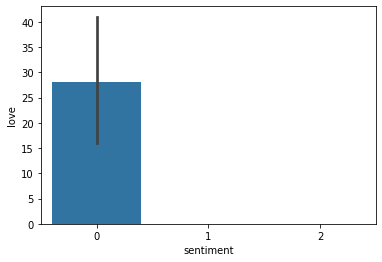

In [29]:
# Distribution of Words Across Different Sentiments
sn.barplot(x='sentiment', y='love', data=email_feature_df_2, estimator=sum)
plt.show()

@Explain:- The word 'love' appears mostly in important email class sentiment documents.

### Naive-Bayes Model

        Naive Bayes is the simplest and fastest classification algorithm for large data. So we can use the Naive-Bayes      algorithm for text sentiment analysis. Because generally, emails have huge text data. Naive Bayes works on the concept  of Baye's theorem. Baye's theorem says, Assume that we would like to predict whether the probability of a document is   positive (or negative) given that the document contains a specific word. So it is calculated by the given formula
    
    P(doc = +ve | word = specific word ) = P(word = specific word | doc = +ve) * P(doc = +ve) / P(word = specific word)
    

In [30]:
from sklearn.model_selection import train_test_split

# Splitting dataset into ratio 70:30 for training and test dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(email_feature_2.toarray(), email_df_1.sentiment, test_size=0.30, random_state=42)

### Build Naive-Bayes Model with Stop Words and Stemming Words

In [31]:
## Creating a new naive bayes model with stop words and stemming words
# Importing naive bayes model 
from sklearn.naive_bayes import MultinomialNB   # It is used for multiple classes.

# Initializing the model 
nb_model_2 = MultinomialNB()

# Fitting the model
nb_model_2.fit(X_train_2,y_train_2)

# Predicting the model
y_pred_2 = nb_model_2.predict(X_test_2)

### Accuracy of Model

        Accuracy of model is the one of the steps of machine learning to check the performance of the model. We can choose  the  best model based on accuracy. The accuracy of the model might be different for different problems. For example, a       regression problem has a root mean squared error, mean absolute error, etc. and a classification problem has a confusion matrix, classification report, roc and auc score, etc. 

In [32]:
# Importing the necessary packages.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, roc_curve, auc

In [33]:
# Determining the accuracy scores for training and testing data set
print('Score for training data set:',accuracy_score(y_train_2,nb_model_2.predict(X_train_2)))
print('Score for testing data set:',accuracy_score(y_test_2,y_pred_2))

Score for training data set: 1.0
Score for testing data set: 0.9821428571428571


@Explanation:- The accuracy of the model for training is 100%, and the test is 98.21%. So these scores suggest that our model is looking good.

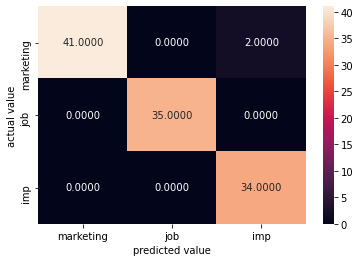

In [34]:
# Determining confusion matrix
sn.heatmap(confusion_matrix(y_test_2,y_pred_2),annot=True,fmt='0.4f',xticklabels=['marketing','job','imp'],yticklabels=['marketing','job','imp'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

@Explanation:- From the confusion matrix, the Marketing class misclassified only 2 observations.

In [35]:
# Determining classification report
print(classification_report(y_test_2,y_pred_2,target_names=['marketing','job','important']))

              precision    recall  f1-score   support

   marketing       1.00      0.95      0.98        43
         job       1.00      1.00      1.00        35
   important       0.94      1.00      0.97        34

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



@Explanation:- From the precision score, the marketing class has 100% ability to identify correct marketing emails between all predicted emails. Also, job and important class have abilities of 100% and 94%, respectively.
    From the recall score, the marketing class has a 95% ability to identify correct marketing emails between all actual emails. Also, jobs and important classes have abilities of 100% for both classes.
    From the f1-score, the marketing class has 98% ability to identify correct marketing emails between all emails. Also, job and important class have abilities of 100% and 97%, respectively.
    From support, we can say that our dataset is balanced. So accuracy score can choose for measuring the ability of the model. It's 98% ability to classify correctly. 

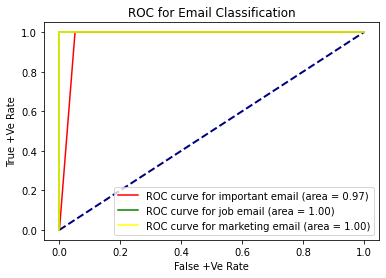

In [36]:
## Determining roc curve

# Importing necessary libraries
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Initializing and fitting model  
y = label_binarize(email_df_1['type_of_email'],classes=['marketing', 'job', 'important'])
num_class = y.shape[1]

# Splitting dataset into ratio 70:30 for training and test dataset
X_train, X_test, y_train, y_test = train_test_split(email_feature_2.toarray(), y, test_size=0.30, random_state=42)

# Using one versus rest classifier for multiple classifications
classifier = OneVsRestClassifier(MultinomialNB())
y_score = classifier.fit(X_train,y_train).predict_proba(X_test)

# Creating a dictionary for false positive, true positive, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

# Executing roc curve and compute roc area for each class
for i in range(num_class):
    fpr[i], tpr[i],_ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plotting the roc curve for all the classes.
plt.figure()
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[2],tpr[2],color='red',label='ROC curve for important email (area = %0.2f)' %roc_auc[2])
plt.plot(fpr[1],tpr[1],color='green',label='ROC curve for job email (area = %0.2f)' %roc_auc[1])
plt.plot(fpr[0],tpr[0],color='yellow',label='ROC curve for marketing email (area = %0.2f)' %roc_auc[0])

# Labelling axises
plt.xlabel('False +Ve Rate')
plt.ylabel('True +Ve Rate')

plt.title('ROC for Email Classification') # It is used to specify the title of the visualization depicted. 
plt.legend(loc='lower right')             # It is used to specify the location of the label

plt.show()                                # It is used to display all figures.

@Explanation:- From the AUC score, our model looks like an as better model. Here only, the important email class has 97% ability to identify the correct important emails from all emails. Otherside, job emails and market emails have 100% ability to identify correct job and market emails from all emails respectively.

### Term Frequency-Inverse Document Frequency (TF-IDF) Model

        The TF-IDF model is also one of the methods of the Bag-of-Words (BoW) Model. It gives a high weight for rare words  and low weight for common words. The main difference between the TF-IDF model and the Count vector model is count vector model provides only the frequency of words, but the TF-IDF model provides the frequency of words and the importance of  words. Therefore, TF-IDF performs better than the Count Vector model. So we decided to build a model of TF-IDF model for text preprocessing.

In [37]:
## Create a new TF-IDF model with stop words and stemming words.

# Importing TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF model with stop words and stemming words
tfidf_model = TfidfVectorizer(stop_words=my_stop_words,analyzer=stemmed_words)

# Creating a dictionary from the corpus
feature_vector_3 = tfidf_model.fit(email_df_1.all_text)

# Transforming the document into vectors
email_tdf_feature = tfidf_model.transform(email_df_1.all_text)

# Getting the feature names from the dictionary
feature = feature_vector_3.get_feature_names()

### Build Naive-Bayes Model with Stop Words and Stemming Words for TF-IDF Model

In [38]:
## Creating a new naive bayes model with stop words and stemming words for TF-IDF model

# Importing Naive-Bayes library
from sklearn.naive_bayes import GaussianNB

# Splitting dataset into ratio 70:30 for training and test dataset
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(email_tdf_feature, email_df_1.sentiment, test_size=0.30, random_state=42)

# Initializing the model
guassiannb_clf = GaussianNB()           # it is used for continuous features.

# Fitting the model
guassiannb_clf.fit(X_train_3.toarray(),y_train_3)

# Predicting the model
email_predicted = guassiannb_clf.predict(X_test_3.toarray())

### Again Check Accuracy of Model

In [39]:
# Determining the accuracy scores for training and testing data set
print('Score for training data set:',accuracy_score(y_train_3,guassiannb_clf.predict(X_train_3.toarray())))
print('Score for testing data set:',accuracy_score(y_test_3,email_predicted))

Score for training data set: 1.0
Score for testing data set: 0.9553571428571429


@Explanation:- The accuracy of the model for training data set is 100%, but testing dataset is 95.53%. So these scores suggest that our model have overfitting and underfitting problem. 

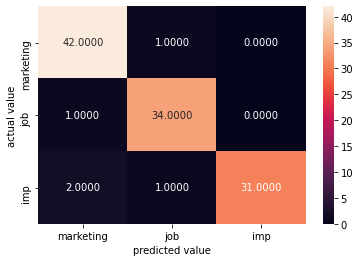

In [40]:
# Determining confusion matrix
sn.heatmap(confusion_matrix(y_test_3,email_predicted),annot=True,fmt='0.4f',xticklabels=['marketing','job','imp'],yticklabels=['marketing','job','imp'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

@Explanation:- From the confusion matrix, the Marketing class misclassified only 1 observation, the Job class misclassified only 1 observation, and the Marketing class misclassified only 3 observation. If we can compare this model with the previous model, we can notice, previous model is better than the this model.

In [41]:
# Determining classification report
print(classification_report(y_test_3,email_predicted,target_names=['marketing','job','important']))

              precision    recall  f1-score   support

   marketing       0.93      0.98      0.95        43
         job       0.94      0.97      0.96        35
   important       1.00      0.91      0.95        34

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



@Explanation:- We can compare this classification report with the previous classification report. After comparing, we can say that previous model is better than the this model.

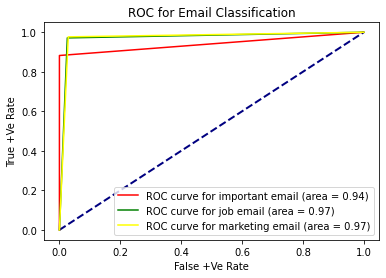

In [42]:
## Determing roc curve

# Splitting dataset into ratio 70:30 for training and test dataset
X_train, X_test, y_train, y_test = train_test_split(email_tdf_feature.toarray(), y, test_size=0.30, random_state=42)

# Using one versus rest classifier for multiple classifications
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train,y_train).predict_proba(X_test)

# Creating dictionary for false positive, true positive, AUS
fpr = dict()
tpr = dict()
roc_auc = dict()

# Executing roc curve and compute roc area for each class
for i in range(num_class):
    fpr[i], tpr[i],_ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plotting the roc curve for all the classes.
plt.figure()
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[2],tpr[2],color='red',label='ROC curve for important email (area = %0.2f)' %roc_auc[2])
plt.plot(fpr[1],tpr[1],color='green',label='ROC curve for job email (area = %0.2f)' %roc_auc[1])
plt.plot(fpr[0],tpr[0],color='yellow',label='ROC curve for marketing email (area = %0.2f)' %roc_auc[0])

# Labelling axises
plt.xlabel('False +Ve Rate')
plt.ylabel('True +Ve Rate')

plt.title('ROC for Email Classification') # It is used to specify the title of the visualization depicted. 
plt.legend(loc='lower right')             # It is used to specify the location of the label

plt.show()                                # It is used to display all figures.

@Explanation:- From the AUC score, If we can compare this model with the previous model, we can notice, the previous model is better than this model.

### Create Classification Model

In [43]:
## Getting new emails for classification.

name = "Medium Daily Digest noreply@medium.com"
subject = "Automate PowerPoint Slides Creation with Python | Samir Saci in Towards Data Science"
date = 'Thu, 29 Sep 2022 7:50:00'
email = """ 
Deshmukhmahesh
Stories for Deshmukhmahesh
@deshmukhmahesh713·Become a member
Medium daily digest
TODAY'S HIGHLIGHTS

Automate PowerPoint Slides Creation with Python
Boost your Productivity with an Automated Tool for the Creation of Operational PowerPoint Reports with Python
Towards Data Science
Samir Saci in Towards Data Science·5 min read
RFM Customer Segmentation using Python
Segmentation of customers in online retail databases using Python, including RFM analysis and clustering.
Melodyyip
Melodyyip·9 min read
Understanding AUC — ROC and Precision-Recall Curves
In this article, we will go through AUC ROC, and Precision-Recall curves concepts and explain how it helps in…
Maria Gusarova
Maria Gusarova·8 min read
Google Data Scientist Interview Questions (Step-by-Step Solutions!)
Are you preparing for a Google Data Scientist interview? Congratulations!
Anna Wu
Anna Wu·7 min read
IN CASE YOU MISSED IT

Hire the Best Folks, Even In a Crazy Market: The “First Ten” Rule
Hiring is harder than ever — but that doesn’t mean you should compromise on who joins your team. Or maybe, it…
Mike Tarullo
Mike Tarullo·6 min read
Pyspark — Filter asap to Reduce run time
Is your spark job taking a long time to run? Is the process bar just slowly creeping along? Many times people…
Justin Davis
Justin Davis·3 min read
Java + Microservice Developer Interview Question Series-10 (Spring Boot…
This article will cover a lot of ground for developers who want to go into microservices using java spring…
Ajay Rathod
Ajay Rathod·4 min read
QUICK READS

Dataclasses — An Awesome approach for OOP in Python
There are two programming approaches: functional and object-oriented. Object-Oriented Programming (OOP) has…
Jai Kishan
Jai Kishan·4 min read
Customer Segmentation using RFM Analysis in Python
Learn how to segment your customer using RFM Analysis in Python.
Uğur Savcı
Uğur Savcı·4 min read
How to Build a Simple ETL Process with Python — A Beginner’s Guide
In this post, I am going to show you how you can download and extract a csv, json and xml file from a zip…
Dayo Opedare
Dayo Opedare·4 min read
BASED ON YOUR READING HISTORY

3 Most Valuable Data Science Skills That Increased My Salary by 60%
Hint: Machine Learning is not one of them
Towards Data Science
Terence Shin in Towards Data Science·4 min readMember only content
Time Series Forecasting using TBATS Model
Multi seasonalities Time series forecasting model with python and R codes
Analytics Vidhya
Nadeem in Analytics Vidhya·9 min read
ML use cases in Banking, Finance & Insurance
Using data science in the Banking, finance and Insurance industry is can make significant improvement in…
Dharmesh Patel
Dharmesh Patel·4 min read
MORE FOR YOU

Stock market prediction using LSTM; will the price go up tomorrow. Practical…
The goal of this tutorial is to create a machine learning model to predict the future value of a stock traded…
Nafiu
Nafiu·6 min read
Easiest Way To Handle Large Datasets in Python
The targeted audience of this blog:
Fareed Khan
Fareed Khan·12 min read
Creating a Reusable Django app
Django Versatility does not stop at creating APIs or Impressive Web apps, We can also create packages from…
Dev Genius
Floyd A. Morgan Jr in Dev Genius·7 min read
EDITORS' PICKS

Putin mobilises — for a second Tsushima
Time for diplomatic isolation and an end to Western limits on heavy weapons
Paul Mason
Paul Mason·6 min readMember only content
The Perils of Heroic Individualism
And what it will take to move beyond the frantic and frenetic energy of our modern times
Brad Stulberg
Brad Stulberg·10 min readMember only content
The Joy of Repairing Laptops
Fixing stuff isn’t just good for the environment — it’s great for your spirits
Clive Thompson
Clive Thompson·6 min readMember only content
See more of what you like and less of what you don’t.
Control your recommendations
Read from anywhere.
Get Medium on the App StoreGet Medium on Google Play
Sent by Medium·Medium, 548 Market St, PMB 42061, San Francisco, CA 94104
Unsubscribe from this type of email·Switch to the Weekly Digest·Careers·Help Center·Privacy Policy·Terms of service
"""

In [44]:
## Creating a user-defined function to predict the category of a new email.

def prediction(name,subject,email):
    
    # Doing all text together.
    all_text = name + subject + email
    
    # Cleaning unwanted words such as punctual marks, white space, etc.
    clean_text = cleaning_text(all_text)
    
    # Converting sentences into word vectors using the count vector model.
    count_word = cv_model_2.transform([clean_text])
    
    # Predicting the email category.
    category = nb_model_2.predict(count_word.toarray())
    
    if category==0:
        return 'Marketing Category'    # Returning the result
    elif category==1:
        return 'Job Category'
    else:
        return 'Important Category'

In [45]:
prediction(name,subject,email)

'Marketing Category'

### Word Cloud

        A word cloud is a collection, or cluster, of words depicted in different sizes. And it is a simple yet powerful      visual representation object for text processing which shows the most frequent word with bigger and bolder letters and  with different colours. Also, it shows the lesser important word in a smaller size. 

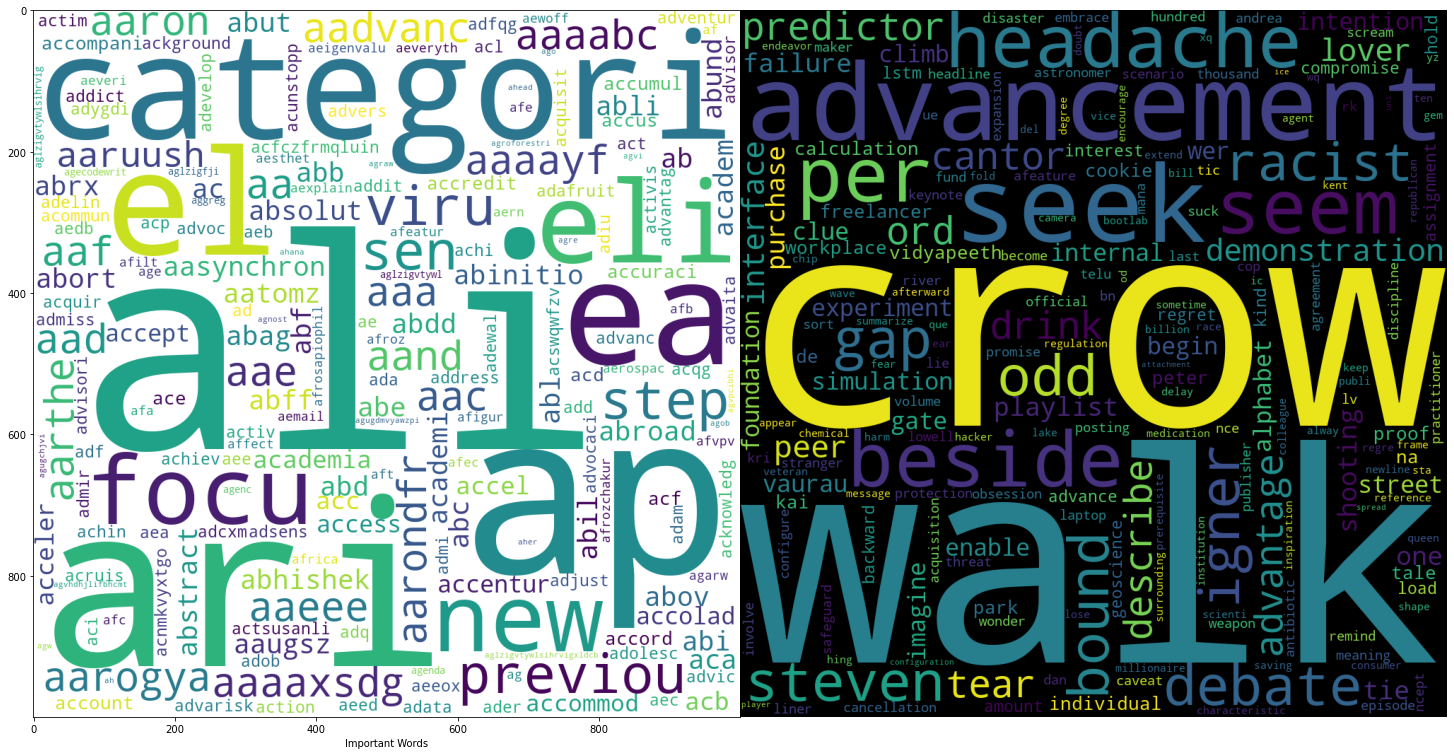

In [46]:
# Importing word cloud library
from wordcloud import WordCloud

# Collecting stop words
stop_words = ''
for word in my_stop_words:
    stop_words = stop_words + word + ' '
    
# Collecting important words
imp_words = ''
for word in feature_2:
    imp_words = imp_words + word + ' '
    
# Creating word clouds
word_cloud = WordCloud(width=1000, height=1000, background_color='Black' ).generate(stop_words)
word_cloud_1 = WordCloud(width=1000, height=1000, background_color='White' ).generate(imp_words)

# Increasing image size
plt.figure(1,figsize=(20,10))

# Plotting word cloud for important words
plt.subplot(121)
plt.imshow(word_cloud_1)
plt.xlabel('Important Words')

# Plotting word cloud for stop words
plt.subplot(122)
plt.imshow(word_cloud)
plt.xlabel('Stop Words')

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

@Explanation:-

    From the white word cloud (i.e. important word), The 'ali', 'previou', 'new', 'viru', 'categori', 'step' and 'ap' words are the most frequent words and other words are less frequent words in the important corpus.
    From the dark word cloud (i.e. stop word), The 'tradeoff', 'roundtable', 'fear', 'last', 'configure', 'billion' and     'cookie' words are  the most frequent words and other words are less frequent words in the stop words corpus.

## Recommendation System

        In simple words, a recommendation system is an algorithm that suggests relevant items to users. We can quickly         provide the right things to the right users using a recommendation system. It's the beauty of a recommendation system.  Therefore, we can create a recommendation system that recommend emails which may be like to the User and also recommend similar emails to these emails. We can find all user interest emails and recommend most five similar emails for these   emails. User interest email recommendation system is based on Content-based Filtering, and those emails can be separated by seeing how many emails see in the past 30 or specific days by the user. A similar email recommendation system is      based on Collaborative Filtering, and those emails can be separated by using the cosine similarity concept.

In [47]:
## Creating a user-defined function to get only dates from the time column.

def extraxt_date(df,name):              # df: data frame & name: variable name
    date_list = []                      # It is used for storing dates.
    for t in range(0,len(df)):
        date = df[name].iloc[t][5:16]   # It is used for extracting only dates from time strings.
        date_list.append(date)
    
    # Assigning the date column.
    df['date'] = date_list 

In [48]:
# Calling the function.
extraxt_date(email_df_1,'time')

In [49]:
## Creating a user-defined function to convert days in a proper format. for eg. 1 --> 01 

def proper_date(df,column_name):    # df: data frame
    d_ls = []                       # It is used for storing dates
    for i in df[column_name]:
        d = (i[:2])                 # Extracting only days 
        if ((d=='1 ') or (d == '2 ') or (d== '3 ') or (d=='4 ') or (d=='5 ') or (d=='6 ') or (d=='7 ') or (d=='8 ') or (d=='9 ')):
            d1 = d.replace(f'{d}',f'0{d}')
            d_ls.append(d1+i[2:-1])

        else:                       # for double digit day
            d_ls.append(i)
    
    # Assigning the proper date column.
    df[column_name] = d_ls

In [50]:
# Calling the function.
proper_date(email_df_1,'date')

In [51]:
## Creating a user-defined function to convert dates in a date time format.

def date_format(df,name):         # df: dataframe & name: name of variable
    # Importing necessary library
    import datetime as dt
    
    date_list = []                # It is used for storing dates
    for d in df[name]:
        date = dt.datetime.strptime(d,'%d %b %Y')    # %d: Day of the month as a zero-padded decimal number.
        date_list.append(date)                       # %b: Month as locale’s abbreviated name.
                                                     # %Y: Year with century as a decimal number.
    # Assigning the date column.        
    df['date'] = date_list 

In [52]:
# Calling the function.
date_format(email_df_1,'date')

In [53]:
# Showing the 5 to 9 rows.
email_df_1[5:10]

,name,subject,email,time,type_of_email,seen_email,sentiment,all_text,date
5,irctc tourism packages irctctourismoffers i...,amritsar dalhousie dharamshala air package ...,wma wma a amritsar dalhousie dharams...,"Sat, 10 Sep 2022 11:44:45",marketing,not_seen,0,irctc tourism packages irctctourismoffers i...,2022-09-10
6,irctc tourism packages irctctourismoffers i...,irctc s royal rajasthan air packages ex mumbai,wma wma irctc s royal rajasthan ai...,"Thu, 8 Sep 2022 11:37:07",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-09-08
7,irctc tourism packages irctctourismoffers i...,mystical nepal ex mumbai,wmo mystical nepal ex mumbai ...,"Mon, 5 Sep 2022 11:47:08",marketing,not_seen,0,irctc tourism packages irctctourismoffers i...,2022-09-05
8,irctc tourism packages irctctourismoffers i...,royal rajasthan swadesh darshan tourist train ...,wzsd royal rajasthan swadesh darshan tou...,"Sat, 3 Sep 2022 10:52:59",marketing,not_seen,0,irctc tourism packages irctctourismoffers i...,2022-09-03
9,irctc tourism packages irctctourismoffers i...,discover ladakh flight package ex delhi,nda discover ladakh flight package ex de...,"Wed, 31 Aug 2022 22:13:23",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-08-31


### User Interest Similar Emails Recommendation System

        This system is based on content-based filtering, and a Content-based recommendation system tries to recommend items based on similarities among items. 

In [59]:
## Creating a user-defined function to show the user most like five emails.

def recommend_user_interest_email(date_time):   # date_time: taking the date from the user
    
    # Extracting only date part
    date = date_time[5:16]
    
    # Importing necessary libraries
    import datetime as dt
    from datetime import timedelta
    
    # Converting date into the proper format 
    date_format = dt.datetime.strptime(date,'%d %b %Y')
    
    # Deciding the previous days to find out user most like emails.
    days = timedelta(days=30)     
    result_date = date_format - days  
    
    # Collecting only user-seen emails in the past 30 days
    df = email_df_1.loc[(email_df_1.date>=result_date)&(date_format>=email_df_1.date)]
    df_seen = df.loc[df.seen_email=='seen']
    
    
    # Cleaning unwanted words such as punctual, white space, etc.
    # Cleaning name column
    clean(df_seen,'name')

    # Cleaning subject column
    clean(df_seen,'subject')

    # Cleaning email column
    clean(df_seen,'email')

    # Doing all text together.
    df_seen['all_text_1'] = df_seen['name'] + df_seen['subject'] + df_seen['email']
    
    # Converting sentences into word vectors using the count vector model.
    count_word_1 = cv_model_2.transform(df_seen.all_text_1)

    # Creating data frame to handle word vector
    compare_1 = pd.DataFrame(count_word_1.todense())
    
    # Assigning the columns to compare dataset 
    compare_1.columns = feature_2
    
    # Dealing with missing value
    compare_1.fillna(value=0,axis=0,inplace=True)
    
    # Importing cosine similarity package.
    from sklearn.metrics.pairwise import cosine_similarity
    
    # Calculating the similarity of new emails by using the cosine function
    word_sim = cosine_similarity(compare_1)
    
    # Fill diagonal with 0
    np.fill_diagonal(word_sim,0)
    
    # Making datasets for similar emails
    word_sim_df = pd.DataFrame(word_sim)
    
    # Returning five most similar emails
    return df_seen.iloc[word_sim_df.idxmax(axis=0)[0:5]]

In [62]:
# Showing the user most like five emails.
recommend_user_interest_email(date)

,name,subject,email,time,type_of_email,seen_email,sentiment,all_text,date,all_text_1
154,medium daily digest noreply medium com,probability for machine learning ajay haltho...,stories for deshmukhmahesh deshmukhmahesh ...,"Thu, 15 Sep 2022 02:20:00",marketing,seen,0,medium daily digest noreply medium com probab...,2022-09-15,medium daily digest noreply medium com probab...
2,irctc tourism packages irctctourismoffers i...,best of himachal ex pune,wma a best of himachal ex pune tour i...,"Thu, 22 Sep 2022 18:43:05",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-09-22,irctc tourism packages irctctourismoffers i...
6,irctc tourism packages irctctourismoffers i...,irctc s royal rajasthan air packages ex mumbai,wma wma irctc s royal rajasthan ai...,"Thu, 8 Sep 2022 11:37:07",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-09-08,irctc tourism packages irctctourismoffers i...
2,irctc tourism packages irctctourismoffers i...,best of himachal ex pune,wma a best of himachal ex pune tour i...,"Thu, 22 Sep 2022 18:43:05",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-09-22,irctc tourism packages irctctourismoffers i...
6,irctc tourism packages irctctourismoffers i...,irctc s royal rajasthan air packages ex mumbai,wma wma irctc s royal rajasthan ai...,"Thu, 8 Sep 2022 11:37:07",marketing,seen,0,irctc tourism packages irctctourismoffers i...,2022-09-08,irctc tourism packages irctctourismoffers i...


### Item Interest Similar Emails Recommendation System

        This system is based on collaborative filtering, and a Collaborative filtering is used by most recommendation        systems to find similar patterns or information of the users.

In [56]:
## Creating similarity datasets for emails using cosine similarity.

# Importing cosine similarity package.
from sklearn.metrics.pairwise import cosine_similarity

# Separating independent variables from an original data set.
email_x = email_feature_df_2.iloc[:,:-1]
    
# Calculating cosine similarity of emails
email_sim = cosine_similarity(email_x)          

# Filling diagonal with 0
np.fill_diagonal(email_sim,0)

# Making dataset for similar emails
email_sim_df = pd.DataFrame(email_sim)

# Assigning columns to email_sim_df data frame
email_sim_df.columns = email_x.index      

# Assigning rows to email_sim_df data frame
email_sim_df.index = email_x.index    

# Showing the first three rows
email_sim_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,363,364,365,366,367,368,369,370,371,372
0,0.000000,0.036295,0.035521,0.017893,0.050028,0.040203,0.027979,0.047980,0.022683,0.074653,...,0.038635,0.038481,0.041843,0.036615,0.036313,0.037164,0.035849,0.028100,0.028624,0.033369
1,0.036295,0.000000,0.520477,0.217273,0.558140,0.486089,0.506955,0.507407,0.313693,0.515620,...,0.023688,0.023594,0.025655,0.029593,0.029348,0.030036,0.028973,0.023317,0.023751,0.039554
2,0.035521,0.520477,0.000000,0.265379,0.555565,0.623159,0.648134,0.588903,0.373130,0.508131,...,0.166790,0.166123,0.180639,0.133949,0.132842,0.135955,0.084191,0.090464,0.092150,0.092835


In [57]:
## Creating a user-defined function to find similar emails of new email

def recommend_item_interest_email(name,subject,email): # name: name of the sender, subject: subject of new email & email: a body of the new email
    
    # Doing all text together.
    all_text = name + subject + email
    
    # Cleaning unwanted words such as punctual, white space, etc.
    clean_text = cleaning_text(all_text)
    
    # Converting sentences into word vectors using the count vector model.
    count_word = cv_model_2.transform([clean_text])
     
    # Creating data frame to handle word vector
    compare = pd.DataFrame(count_word.todense())
    
    # Assigning the columns to compare dataset 
    compare.columns = feature_2
    
    # Separating independent variables from an original data set.
    email_x = email_feature_df_2.iloc[:,:-1]
    
    # Adding a new email to the original dataset to see similarities between them.
    join = pd.concat([email_x, compare],join='inner')
    
    # Dealing with missing value
    join.fillna(value=0,axis=0,inplace=True)

    # Calculating the similarity of new emails by using the cosine function
    word_sim = cosine_similarity(join)  
    
    # Fill diagonal with 0
    np.fill_diagonal(word_sim,0)
    
    # Making datasets for similar emails
    word_sim_df = pd.DataFrame(word_sim)
    df = word_sim_df.iloc[:,-1]

    # Extracting the most five similar emails of the new email
    max_lis = []
    for i in range(0,len(df)):        # df: data frame of similar emails
        p = df.idxmax()               # Getting index of maximum similar value
        max_lis.append(p)
        df.drop(labels=[p],inplace=True) # Deleting the maximum index for the next maximum index.
    
    # Returning the most five similar emails
    res = max_lis[:5]
    return email_df.iloc[res,:] 

In [58]:
# Showing the most five similar emails
recommend_item_interest_email(name,subject,email)

,name,subject,email,time,type_of_email,seen_email,sentiment
141,Medium Daily Digest <noreply@medium.com>,Automate PowerPoint Slides Creation with Pytho...,Stories for Deshmukhmahesh deshmukhmahesh ...,"Thu, 29 Sep 2022 02:20:00",marketing,not_seen,0
153,Medium Daily Digest <noreply@medium.com>,How To Predict Customer Churn Risk using Machi...,Stories for Deshmukhmahesh deshmukhmahesh ...,"Fri, 16 Sep 2022 02:20:00",marketing,not_seen,0
161,Medium Daily Digest <noreply@medium.com>,Automate Operational Reports Distribution in H...,Stories for Deshmukhmahesh deshmukhmahesh ...,"Thu, 08 Sep 2022 02:20:00",marketing,not_seen,0
194,Medium Daily Digest <noreply@medium.com>,"Forget Data Analytics Roadmaps, Master This Fi...",Stories for Deshmukhmahesh deshmukhmahesh ...,"Tue, 26 Jul 2022 02:20:00",marketing,not_seen,0
174,Medium Daily Digest <noreply@medium.com>,11 Books Every Data Scientist Must Read In 202...,Stories for Deshmukhmahesh deshmukhmahesh ...,"Thu, 25 Aug 2022 02:20:00",marketing,not_seen,0


### Conclusion

1. From accuracy scores, confusion matrices, classification reports and AUC values, we can say that the count vector model is better than the TF-IDF model for email classification. Therefore, we selected a count vector model for the email classification.
2. We made classification model on Count vector model with 98.21% accuracy.
3. We made user interest similar emails recommendation system and item interest similar emails recommendation system successfully.
4. Also, we can change the number of days to define users' interests. We can recommend the most recent emails using our recommendation system.

### Future Work and Scope

        In text analysis, data cleaning is a big challenge. So we would ensure more about the cleaning data in the next       version of this project. Also, here we took only one email account for creating the dataset. So we found only three      categories of emails. However, the bigger the inbox of an email account will be richer the data, and that can allow us   to categorise data into various other classes. Implementing our package would be more interesting in that case.
        We can create a similar recommendation system based on the current project in the medical field. for example,        recommending prescriptions to the patients. 
        Looking from the other prespective, we can use the similar project/techniques for finding the potential customers of specific interest where marketing can be done and the buisness can be expanded.

### Acknowledgements

    
First and foremost, I am grateful of my project guide Dhairyashil Jagadale (sir) wholeheartedly for his valuable guidance. I am also thankful of the CareerGram Institute, Pune, where I got the golden opportunity to work on this project. And finally, I thank to my parents and friends for their contiunous suport.

### References

1. Manaranjan Pradhan, and U Dinesh Kumar (2021). Machine Learning using Python, Wiley India, India.
2. Bharti Motwani (2021). Data Analytics using Python, Wiley India, India.
3. NumPy Library: https://numpy.org/
4. Pandas Library: https://pandas.pydata.org/
5. Matplotlib Library: https://matplotlib.org/
6. Seaborn Library: https://seaborn.pydata.org/
7. Scikit-learn documentations at https://scikit-learn.org/
8. re — Regular expression operations: https://docs.python.org/3/library/re.html
9. datetime — Basic date and time types: https://docs.python.org/3/library/datetime.html
10. Precision, Recall, F1 score, True Positive|Deep Learning Tutorial 19 (Tensorflow2.0, Keras & Python), codebasics: https://youtu.be/2osIZ-dSPGE
11. ROC and AUC, Clearly Explained!, StatQuest with Josh Starmer: https://youtu.be/4jRBRDbJemM
12. Content-based Filtering | Machine Learning - Google Developers(Advanced course in Google): https://developers.google.com/machinelearning/recommendation/contentbased/basics#:~:text=Content%2Dbased%20filtering%20uses%20item,previous%20actions%20or%20explicit%20feedback.
13. AMT2 - Extracting Emails from your Gmail Inbox using python, DigitalSreeni: https://youtu.be/K21BSZPFIjQ
14. What is collaborative filtering? - Definition from WhatIs.com, WhatIs.com: https://www.techtarget.com/whatis/definition/collaborative-filtering 
15. Introduction to Collaborative Filtering, Analytics Vidhya: https://www.analyticsvidhya.com/blog/2022/02/introduction-to-collaborative-filtering/
16. Recommendation System -Understanding The Basic Concepts, Analytics Vidhya: https://www.analyticsvidhya.com/blog/2021/07/recommendation-system-understanding-the-basic-concepts/